# <U>WOMENS CLOTHING (E-COMMERCE)

### <U>OBJECTIVE:
    
- The goal is to determine if a customer will recommend this product or not based (Customer Recommendation) on text fields such as review text & title, categorical fields such as Class, Department, Division and continuous fields such as Age, Rating, Posistive Feedback Count.
- Futher to determine the customer ratings for a product by building a model for predicting ratings on the basis of customer reviews.
    
<b> Outline:
- Importing Libraries
- Loading Dataset
- Exploring Dataset
- Exploratory Data Analysis and Data Vizualization
- Data Pre-processing
- Wordlcloud Visualization
- Machine Learnin Models
- Deep Learning Models
- Insights: Customer Recommendation
- Review Rating Prection Model
- Predictions
- Conclusion


### Importing Libraries:

In [1]:
import re
import pandas as pd
import numpy as np
import glob
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import collections

from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset:

In [2]:
# Load the data

df = pd.read_csv("/Users/Devender/Documents/DLNLP/Data/Womens Clothing E-Commerce Reviews.csv", index_col=0)

Mounted at /content/drive


<b> About the data:

In [3]:
# The first 5 rows of the data
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
# The dimension f the data
df.shape

(23486, 10)

In [5]:
# The name of columns in the data
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [6]:
# Data types of each column
df.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [7]:
# The number of unique Clothing IDs
df['Clothing ID'].nunique()

1206

In [8]:
# List of Division Names
df['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [9]:
# List of Department Names
df['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [10]:
# List of Class Names
df['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

In [11]:
# Number of null in each column
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

### Exploratory Data Analysis and Data Visualization

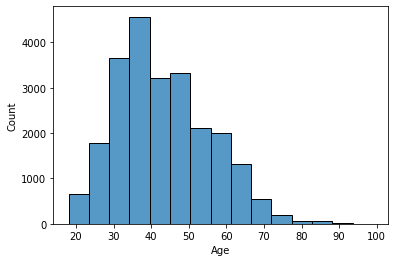

In [12]:
# Distribution of Age column
sns.histplot(df.Age, bins = 15)

<b> The majority of reviewers age between 30 and 50 yeare old.

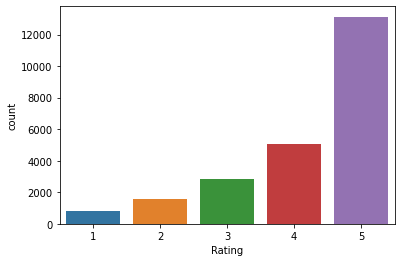

In [13]:
sns.countplot(df["Rating"])

<b> The majority of reviewers rated 5, and the minority rated 1.

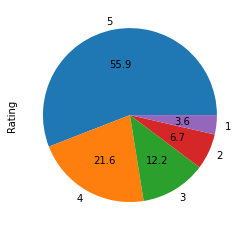

In [14]:
(df['Rating'].value_counts()).plot(kind = "pie", autopct='%1.1f')

<b> The majority of reviewers (55.9%) rated "5". The minority of reviewers (3.6%) rated "1". 77.5% of reviewers rated "4" and "5" (satisfied). 10.3% of reviewers rated "1" and "2" (not satisfied). 12.2% of reviewers rated "3" (neutral).

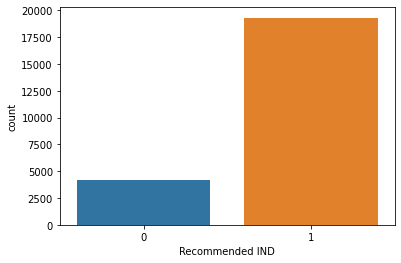

In [15]:
sns.countplot(df["Recommended IND"])

<b> The majority of reviewers recommended the products.

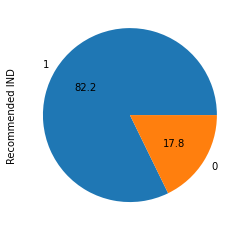

In [16]:
(df["Recommended IND"].value_counts()).plot(kind = "pie", autopct='%1.1f')

<b> The majority of reviewers (82.2%) recommended the products. The minority of reviewers (17.8%) did not recommend the products.

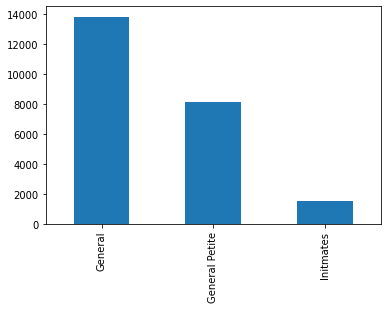

In [17]:
# Distribution of Division Names
df['Division Name'].value_counts().plot(kind = "bar")

<b> The majority of Division Names are General, and the minority are Intimates.

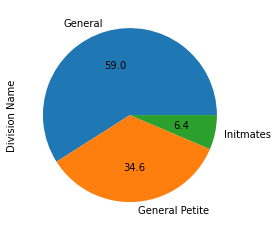

In [18]:
df['Division Name'].value_counts().plot(kind = "pie", autopct='%1.1f')

<b> The majority of Division Names (59%) are General, and the minority (6.4%) are Intimates.

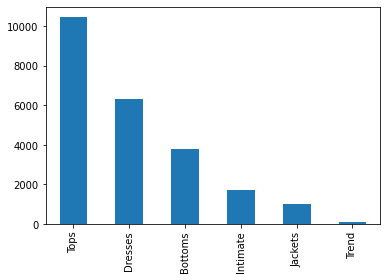

In [19]:
# Distribution of Department Names
df['Department Name'].value_counts().plot(kind = "bar")

<b> The majority of Department Names are Tops, and the minority are Trend.

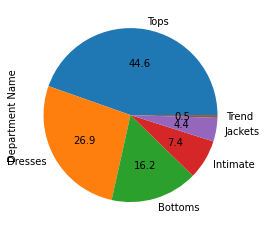

In [20]:
df['Department Name'].value_counts().plot(kind = "pie", autopct='%1.1f')

<b> The majority of Department Names (44.6%) are Tops, and the minority (0.5%) are Trend.

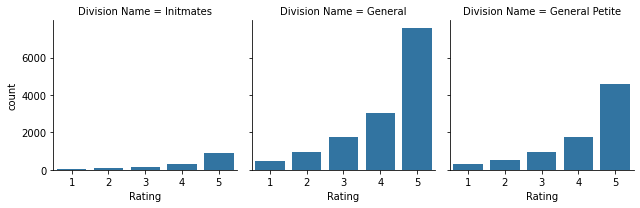

In [21]:
g = sns.FacetGrid(df, col="Division Name", col_wrap=3)
g.map(sns.countplot, "Rating")

<b> The shape of the Rating distribution is almost the same for different Division Names. The majority of reviewers rated 5 and the minority rated 1 for each Division Name.

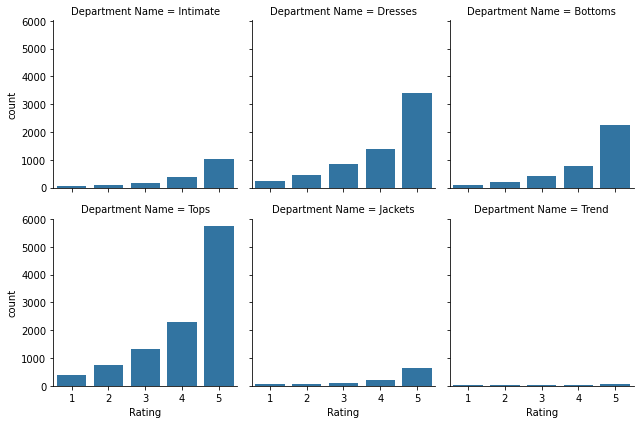

In [22]:
g = sns.FacetGrid(df, col="Department Name", col_wrap=3)
g.map(sns.countplot, "Rating")

<b> The shape of the Rating distribution is almost the same for different Department Names. The majority of reviewers rated 5 and the minority rated 1 for each Department Name.

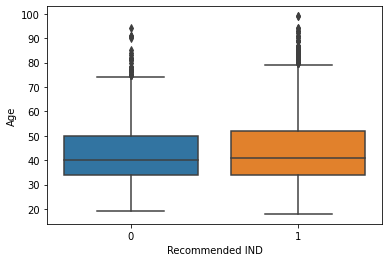

In [23]:
# Age distribution for both recommended and not-recommended groups 
sns.boxplot(y="Age", x="Recommended IND", data=df)

<b> For both recommended and not-recommended groups, the median age is between 40 and 45 years old.

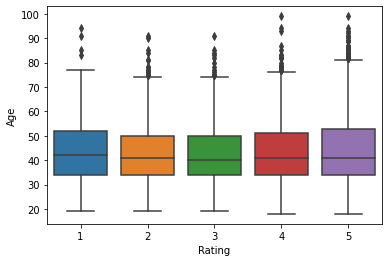

In [24]:
# Age distribution for each Rating group 
sns.boxplot(y="Age", x="Rating", data=df)

<b> For all Rating groups, the median age is between 40 and 45 years old.

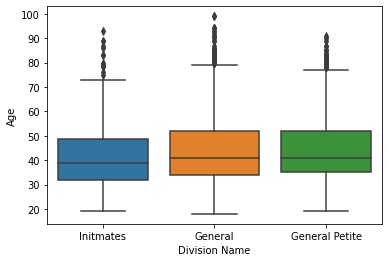

In [25]:
# Age distribution for each Devision Name 
sns.boxplot(y="Age", x="Division Name", data=df)

<b> For all Division groups, the median age is almost between 40 and 45 years old.

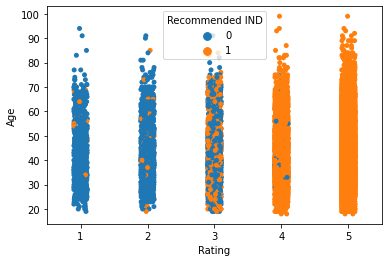

In [26]:
# Relation between Rating and recommendation
sns.stripplot(y="Age", x="Rating", hue="Recommended IND", data=df)

<b> Almost all reviewers who rate 1 and 2 did not recommend the product and almost all reviewers who rate 4 and 5 did recommend.

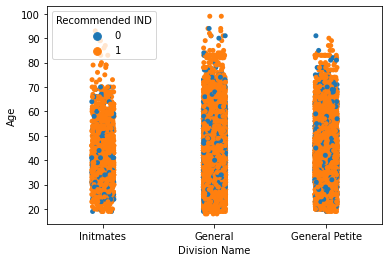

In [27]:
# Number of recommoned products for each Division
sns.stripplot(y="Age", x="Division Name", hue="Recommended IND", data=df)

<b> The majority of reviewers recommended the product for each Division Name

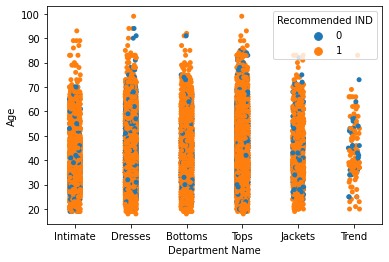

In [28]:
# Number of recommoned products for each Department
sns.stripplot(y="Age", x="Department Name", hue="Recommended IND", data=df)

<b> The majority of reviewers recommended the product for each Department Name.

### Data Pre-processing

In [29]:
# Checking for duplicated entries
duplicates = df.duplicated().sum() 
if  duplicates == 0:
    print("There are no duplicted rows in this data")
else:
    print(f"There are: {duplicates} duplicated rows")

There are: 21 duplicated rows


In [30]:
# Drop the duplicated rows
df=df.drop_duplicates()

In [31]:
# Number of null in each column
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3789
Review Text                 825
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [32]:
# Drop rows with null values in "Review Text" column
df = df.dropna(subset=["Review Text"])

In [33]:
# Number of null in each column
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      2965
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

In [34]:
# selecting only required columns for ML models
df_text = df[["Review Text", "Recommended IND"]]

In [35]:
# Preprocess the text with function processtext()
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")

stop_words = stopwords.words('english')
# Remove Negative verbs and "not" from stop_words
stop_words_new = stop_words[:-36]
stop_words_new.remove("not")

punctuations = list(string.punctuation)
lemma = WordNetLemmatizer() # for Lemmatisation

def processtext(text):
    text=re.sub("[^a-zA-Z]"," ",text) # Filter to allow only alphabets in text
    text=text.lower() # Convert the text to lowercase to maintain consistency
    tokens=word_tokenize(text) # Tokenize the text
    # Remove stopwords and punctuations
    tokens=[token for token in tokens if token not in stop_words_new and token not in punctuations] 
    tokens=[lemma.lemmatize(token) for token in tokens] # Lemmatisation of tokens
    text=" ".join(tokens)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:

  import nltk
  nltk.download('punkt')
  nltk.download('wordnet')
  nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [37]:
# Preprocess the "Review Text" column with function processtext()
df_text["processed_Review"] = df_text["Review Text"].apply(lambda x: processtext(x))

<b> Since the classification data (recommended and not-recommended) is unbalanced, we will do over-sampling which involves adding more examples from the minority class (not-recommended).

In [38]:
# number of reviews that recommeneded the product
df_text[(df_text['Recommended IND']==1)].shape[0]

18539

In [39]:
from sklearn.utils import resample

# Create two different dataframes of majority and minority class 
df_majority = df_text[(df_text['Recommended IND']==1)] 
df_minority = df_text[(df_text['Recommended IND']==0)] 

# Oversample the minority class
df_minority_oversampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=15539 , # to match majority class with 18539 rows
                                 random_state=42)  # reproducible results
                                 
# Combine majority class with oversampled minority class
df_oversampled = pd.concat([df_minority_oversampled, df_majority])

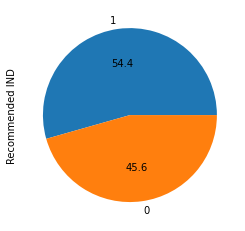

In [40]:
# Distribution of the new oversampled dataframe
df_oversampled['Recommended IND'].value_counts().plot(kind="pie", autopct='%1.1f')

<b> The classification data (recommended and not-recommended) is now almost balanced,

### Wordcloud Visualization

In [41]:
pos_df = df_oversampled[df_oversampled['Recommended IND']== 1]
neg_df = df_oversampled[df_oversampled['Recommended IND']== 0]
pos_df.head(3)

,Review Text,Recommended IND,processed_Review
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,1,love dress sooo pretty happened find store gla...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...


In [42]:
pos_words =[]
neg_words = []

for review in pos_df.processed_Review:
    pos_words.append(review) 
pos_words = ' '.join(pos_words)
pos_words[:40]

for review in neg_df.processed_Review:
    neg_words.append(review)
neg_words = ' '.join(neg_words)
neg_words[:400]

'fence dress fabric gorgeous soft however hoping fit slouchy like picture model much shorter pictured reference turtle neck part dress kind high tight wanted love much touch hoping going love everything cloth stone excited see made dress hooray ordered xl usual size shirt tried sad see barely fit around tummy hip true size xl barely gave enough room move chest also caused dreaded button gape clear '

<b> Wordcloud: Positive Reviews

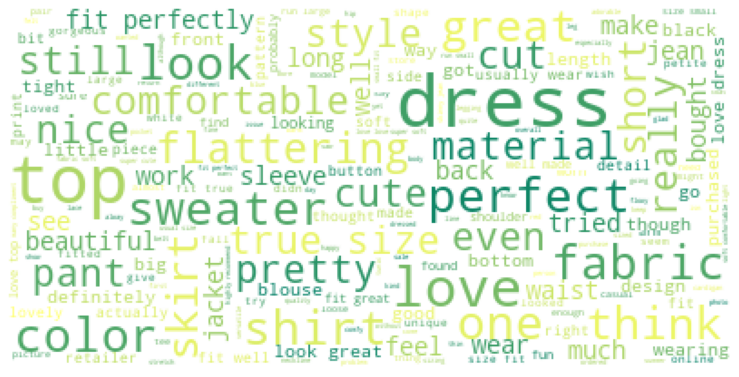

In [43]:
wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<b> Wordcloud: Negative Reviews

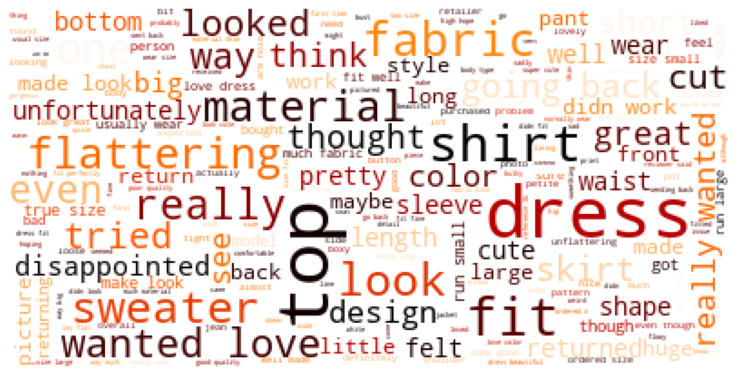

In [44]:
wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Machine Learning Models

In [45]:
# Define X and y for ML models
X = df_oversampled["processed_Review"]
y = df_oversampled["Recommended IND"]

In [46]:
# Convert a collection of text features to a matrix of word counts
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = (tfidf.fit_transform(X)).toarray()
# pd.DataFrame(X, columns = tfidf.get_feature_names())

# split the data (X, y) to train-data and test-data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, stratify=y, random_state=101)

from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix

In [47]:
def ML_models_performance(model, X_train, y_train ,X_test ,y_test, y_pred, model_name):
 
    performance_df=pd.DataFrame({'Train_accuracy':model.score(X_train,y_train),"Test_accuracy":model.score(X_test,y_test),
                       "Precision":precision_score(y_pred,y_test),"Recall":recall_score(y_pred,y_test),
                       "F1_Score":f1_score(y_pred,y_test)}, index=[model_name])
    return performance_df

In [48]:
from sklearn.linear_model import LogisticRegression

# Create the LogisticRegression model
lr = LogisticRegression( )
# Fit the model
lr.fit(X_train, y_train)
# Use the trained model to predict
y_pred = lr.predict(X_test)
# model accuracy
print(f'Model train accuracy: {lr.score(X_train, y_train)*100:.3f}%')
print(f'Model test accuracy: {lr.score(X_test, y_test)*100:.3f}%')
print(f'Model test precision: {precision_score(y_pred,y_test):.3f}')
print(f'Model test recall: {recall_score(y_pred,y_test):.3f}')
print(f'Model test f1_score: {f1_score(y_pred,y_test):.3f}')

Model train accuracy: 91.189%
Model test accuracy: 89.070%
Model test precision: 0.893
Model test recall: 0.905
Model test f1_score: 0.899


In [49]:
lr_performance = ML_models_performance(lr, X_train, y_train ,X_test ,y_test, y_pred, "Logisitc Regression")
lr_performance

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score
Logisitc Regression,0.911892,0.890698,0.893204,0.904671,0.898901


In [50]:
from sklearn.svm import LinearSVC
# Create the LinearSVC model with some regularization
LSVC = LinearSVC(random_state=1, dual=False, C=0.5)
# Fit the model
LSVC.fit(X_train, y_train)
# Use the trained model to predict
y_pred = LSVC.predict(X_test)

# model accuracy
print(f'Model train accuracy: {LSVC.score(X_train, y_train)*100:.3f}%')
print(f'Model test accuracy: {LSVC.score(X_test, y_test)*100:.3f}%')
print(f'Model test precision: {precision_score(y_pred,y_test):.3f}')
print(f'Model test recall: {recall_score(y_pred,y_test):.3f}')
print(f'Model test f1_score: {f1_score(y_pred,y_test):.3f}')

Model train accuracy: 93.750%
Model test accuracy: 90.830%
Model test precision: 0.901
Model test recall: 0.929
Model test f1_score: 0.914


In [51]:
LSVC_performance = ML_models_performance(LSVC, X_train, y_train ,X_test ,y_test, y_pred, "LinearSVC")
LSVC_performance

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score
LinearSVC,0.937495,0.908304,0.900755,0.928552,0.914442


In [52]:
from sklearn.ensemble import RandomForestClassifier
# Create the RandomForestClassifier model
rfc = RandomForestClassifier(random_state=1)
# Fit the model
rfc.fit(X_train, y_train)
# Use the trained model to predict
y_pred = rfc.predict(X_test)
# model accuracy
print(f'Model train accuracy: {rfc.score(X_train, y_train)*100:.3f}%')
print(f'Model test accuracy: {rfc.score(X_test, y_test)*100:.3f}%')
print(f'Model test precision: {precision_score(y_pred,y_test):.3f}')
print(f'Model test recall: {recall_score(y_pred,y_test):.3f}')
print(f'Model test f1_score: {f1_score(y_pred,y_test):.3f}')

Model train accuracy: 100.000%
Model test accuracy: 96.831%
Model test precision: 0.959
Model test recall: 0.983
Model test f1_score: 0.971


In [53]:
rfc_performance = ML_models_performance(rfc, X_train, y_train ,X_test ,y_test, y_pred, "Random Forest")
rfc_performance

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score
Random Forest,1.0,0.96831,0.958738,0.982587,0.970516


In [54]:
comparison_df = pd.concat([lr_performance, LSVC_performance, rfc_performance])
comparison_df

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score
Logisitc Regression,0.911892,0.890698,0.893204,0.904671,0.898901
LinearSVC,0.937495,0.908304,0.900755,0.928552,0.914442
Random Forest,1.000000,0.968310,0.958738,0.982587,0.970516


### Deep Learning Models

In [55]:
x = df_oversampled['Review Text'].values
y = df_oversampled['Recommended IND'].values

I now vectorize 'Review Text' in keras, by turning each review into a sequence of integers.

In [56]:
# Turning each review into a sequence of integers 
from keras.preprocessing.text import Tokenizer
num_words = 10000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(x)
xtokens= tokenizer.texts_to_sequences(x)

In [57]:
len_seqs = []
for i in range(len(xtokens)):
    len_seqs.append(len(xtokens[i]))
    
print(f'maximum seuence length is {max(len_seqs)}.') 
#print(max(set(len_seqs), key = len_seqs.count))

len_seqs_array = np.array(len_seqs)
print(f'The number of sequences with lengh more than 50 is  {(len_seqs_array>50).sum()}.')

maximum seuence length is 116.
The number of sequences with lengh more than 50 is  20468.


In [58]:
# Pad sequences to the same length (maxlen)
from keras.preprocessing.sequence import pad_sequences

maxlen=50
xpad=pad_sequences(xtokens,padding='post', maxlen=maxlen)

In [59]:
xpad.shape

(34078, 50)

In [60]:
from sklearn.model_selection import train_test_split
#train_test splot
x_train, x_test, y_train, y_test = train_test_split(xpad, y, test_size=0.2, stratify=y,random_state=42)

In [61]:
x_train.shape

(27262, 50)

In [62]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,GRU,Bidirectional
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2

model=Sequential()

model.add(Embedding(input_dim=num_words,output_dim=32,input_length=maxlen))

model.add(LSTM(units=64,dropout=0.4,return_sequences=True))
model.add(LSTM(units=32,dropout=0.4,return_sequences=True))
model.add(LSTM(units=16))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
model.summary()


#model.compile('rmsprop', 'mse')
#model.summary()
#output = model.predict(xpad)
#print(output.shape)
#print(output)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            320000    
                                                                 
 lstm (LSTM)                 (None, 50, 64)            24832     
                                                                 
 lstm_1 (LSTM)               (None, 50, 32)            12416     
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 360,401
Trainable params: 360,401
Non-trai

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 10, restore_best_weights=True)

In [64]:
model.fit(x_train,y_train, epochs=20, batch_size=32, validation_data=(x_test , y_test), callbacks= [early_stop])

Epoch 1/20
852/852 [==============================] - 76s 82ms/step - loss: 0.3976 - accuracy: 0.8250 - val_loss: 0.2902 - val_accuracy: 0.8875
Epoch 2/20
852/852 [==============================] - 68s 80ms/step - loss: 0.2622 - accuracy: 0.9045 - val_loss: 0.2342 - val_accuracy: 0.9098
Epoch 3/20
852/852 [==============================] - 68s 80ms/step - loss: 0.2096 - accuracy: 0.9261 - val_loss: 0.2117 - val_accuracy: 0.9202
Epoch 4/20
852/852 [==============================] - 68s 80ms/step - loss: 0.1782 - accuracy: 0.9395 - val_loss: 0.2104 - val_accuracy: 0.9218
Epoch 5/20
852/852 [==============================] - 69s 81ms/step - loss: 0.1512 - accuracy: 0.9495 - val_loss: 0.1998 - val_accuracy: 0.9281
Epoch 6/20
852/852 [==============================] - 68s 80ms/step - loss: 0.1355 - accuracy: 0.9552 - val_loss: 0.1902 - val_accuracy: 0.9357
Epoch 7/20
852/852 [==============================] - 68s 80ms/step - loss: 0.1192 - accuracy: 0.9626 - val_loss: 0.2047 - val_accuracy:

In [65]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.397606,0.825031,0.290214,0.887471
1,0.262195,0.904519,0.234175,0.909771
2,0.209621,0.926124,0.211661,0.920188
3,0.178154,0.939550,0.210381,0.921802
4,0.151192,0.949527,0.199849,0.928110


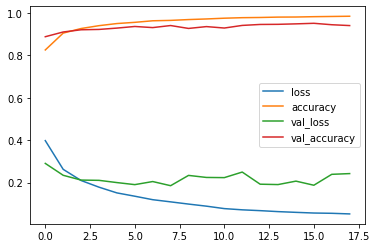

In [66]:
model_loss.plot()

In [67]:
y_pred = (model.predict(x_test)>=0.5).astype("int32")

In [68]:
LSTM_performance=pd.DataFrame({'Train_accuracy':(model.evaluate(x_train,y_train))[1],"Test_accuracy":(model.evaluate(x_test,y_test))[1],
                       "Precision":precision_score(y_pred,y_test),"Recall":recall_score(y_pred,y_test),
                       "F1_Score":f1_score(y_pred,y_test)}, index=["LSTM"])
LSTM_performance

213/213 [==============================] - 4s 19ms/step - loss: 0.1852 - accuracy: 0.9401


,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score
LSTM,0.983824,0.940141,0.914509,0.973866,0.943255


In [69]:
comparison_df = pd.concat([lr_performance, LSVC_performance, rfc_performance, LSTM_performance])
comparison_df

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score
Logisitc Regression,0.911892,0.890698,0.893204,0.904671,0.898901
LinearSVC,0.937495,0.908304,0.900755,0.928552,0.914442
Random Forest,1.000000,0.968310,0.958738,0.982587,0.970516
LSTM,0.983824,0.940141,0.914509,0.973866,0.943255


In [70]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,GRU,Bidirectional
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2

model2 = Sequential()

model2.add(Embedding(input_dim=num_words,output_dim=32,input_length=maxlen)) 

model2.add(GRU(units=64, return_sequences=True))  
model2.add(GRU(units=32, return_sequences=True))
model2.add(GRU(units=16)) 
model2.add(Dropout(0.4))
model2.add(Dense(1, activation='sigmoid')) 
 
model2.compile(loss="binary_crossentropy", optimizer='Adam', metrics=["Accuracy"])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 32)            320000    
                                                                 
 gru (GRU)                   (None, 50, 64)            18816     
                                                                 
 gru_1 (GRU)                 (None, 50, 32)            9408      
                                                                 
 gru_2 (GRU)                 (None, 16)                2400      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 350,641
Trainable params: 350,641
Non-tr

In [71]:
model2.fit(x_train,y_train, epochs=20, batch_size=32, validation_data=(x_test , y_test), callbacks= [early_stop])

Epoch 1/20
852/852 [==============================] - 74s 80ms/step - loss: 0.3784 - Accuracy: 0.8305 - val_loss: 0.2676 - val_Accuracy: 0.8972
Epoch 2/20
852/852 [==============================] - 67s 79ms/step - loss: 0.2318 - Accuracy: 0.9173 - val_loss: 0.2183 - val_Accuracy: 0.9221
Epoch 3/20
852/852 [==============================] - 67s 79ms/step - loss: 0.1636 - Accuracy: 0.9459 - val_loss: 0.1960 - val_Accuracy: 0.9306
Epoch 4/20
852/852 [==============================] - 67s 79ms/step - loss: 0.1204 - Accuracy: 0.9629 - val_loss: 0.2034 - val_Accuracy: 0.9393
Epoch 5/20
852/852 [==============================] - 67s 78ms/step - loss: 0.0847 - Accuracy: 0.9751 - val_loss: 0.2034 - val_Accuracy: 0.9412
Epoch 6/20
852/852 [==============================] - 67s 78ms/step - loss: 0.0645 - Accuracy: 0.9821 - val_loss: 0.2041 - val_Accuracy: 0.9429
Epoch 7/20
852/852 [==============================] - 67s 78ms/step - loss: 0.0506 - Accuracy: 0.9862 - val_loss: 0.2099 - val_Accuracy:

In [72]:
model2_loss = pd.DataFrame(model2.history.history)
model2_loss.head()

,loss,Accuracy,val_loss,val_Accuracy
0,0.378444,0.830497,0.267599,0.897154
1,0.231791,0.917284,0.218311,0.922095
2,0.163604,0.945859,0.195989,0.930604
3,0.120356,0.962879,0.203431,0.939261
4,0.084722,0.975094,0.203409,0.941168


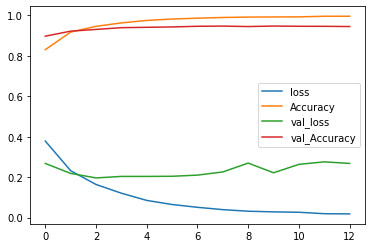

In [73]:
model2_loss.plot()

In [74]:
y_pred = (model2.predict(x_test)>=0.5).astype("int32")

In [75]:
GRU_performance=pd.DataFrame({'Train_accuracy':(model2.evaluate(x_train,y_train))[1],"Test_accuracy":(model2.evaluate(x_test,y_test))[1],
                       "Precision":precision_score(y_pred,y_test),"Recall":recall_score(y_pred,y_test),
                       "F1_Score":f1_score(y_pred,y_test)}, index=["GRU"])
GRU_performance

213/213 [==============================] - 3s 15ms/step - loss: 0.1960 - Accuracy: 0.9306


,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score
GRU,0.971352,0.930604,0.90507,0.9652,0.934168


In [76]:
comparison_df = pd.concat([lr_performance, LSVC_performance, rfc_performance, LSTM_performance, GRU_performance])
comparison_df

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score
Logisitc Regression,0.911892,0.890698,0.893204,0.904671,0.898901
LinearSVC,0.937495,0.908304,0.900755,0.928552,0.914442
Random Forest,1.000000,0.968310,0.958738,0.982587,0.970516
LSTM,0.983824,0.940141,0.914509,0.973866,0.943255
GRU,0.971352,0.930604,0.905070,0.965200,0.934168


In [77]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,GRU,Bidirectional
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2

model3 = Sequential()

model3.add(Embedding(input_dim = num_words, output_dim = 32,input_length = maxlen))

model3.add(Bidirectional(LSTM(units = 64,return_sequences = True )))
model3.add(Bidirectional(LSTM(units = 32, return_sequences = True)))
model3.add(Bidirectional(LSTM(units = 16)))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation = 'sigmoid'))

model3.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ["Accuracy"])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 32)            320000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 128)          49664     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 50, 64)           41216     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)               10368     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                      

In [78]:
model3.fit(x_train, y_train, epochs = 20, batch_size = 32,
         validation_data = (x_test, y_test), callbacks = [early_stop])

Epoch 1/20
852/852 [==============================] - 127s 136ms/step - loss: 0.3599 - Accuracy: 0.8432 - val_loss: 0.2640 - val_Accuracy: 0.8958
Epoch 2/20
852/852 [==============================] - 107s 125ms/step - loss: 0.2186 - Accuracy: 0.9216 - val_loss: 0.2347 - val_Accuracy: 0.9145
Epoch 3/20
852/852 [==============================] - 107s 125ms/step - loss: 0.1664 - Accuracy: 0.9441 - val_loss: 0.2066 - val_Accuracy: 0.9271
Epoch 4/20
852/852 [==============================] - 107s 126ms/step - loss: 0.1282 - Accuracy: 0.9606 - val_loss: 0.2008 - val_Accuracy: 0.9340
Epoch 5/20
852/852 [==============================] - 107s 126ms/step - loss: 0.1061 - Accuracy: 0.9681 - val_loss: 0.1838 - val_Accuracy: 0.9388
Epoch 6/20
852/852 [==============================] - 118s 139ms/step - loss: 0.0823 - Accuracy: 0.9771 - val_loss: 0.1944 - val_Accuracy: 0.9381
Epoch 7/20
852/852 [==============================] - 111s 130ms/step - loss: 0.0694 - Accuracy: 0.9803 - val_loss: 0.2158 -

In [79]:
model3_loss = pd.DataFrame(model3.history.history)
model3_loss.head()

,loss,Accuracy,val_loss,val_Accuracy
0,0.359936,0.843188,0.263995,0.895833
1,0.218628,0.921649,0.234690,0.914466
2,0.166430,0.944098,0.206578,0.927083
3,0.128229,0.960568,0.200812,0.933979
4,0.106078,0.968087,0.183791,0.938820


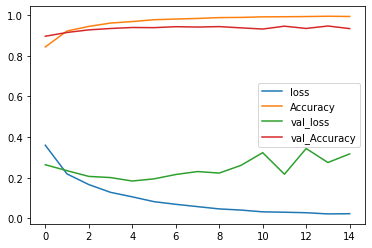

In [80]:
model3_loss.plot()

In [81]:
y_pred = (model3.predict(x_test)>=0.5).astype("int32")

In [82]:
Bidirectional_LSTM_performance=pd.DataFrame({'Train_accuracy':(model3.evaluate(x_train,y_train))[1],"Test_accuracy":(model3.evaluate(x_test,y_test))[1],
                       "Precision":precision_score(y_pred,y_test),"Recall":recall_score(y_pred,y_test),
                       "F1_Score":f1_score(y_pred,y_test)}, index=["Bidirectional LSTM"])
Bidirectional_LSTM_performance

213/213 [==============================] - 6s 28ms/step - loss: 0.1838 - Accuracy: 0.9388


,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score
Bidirectional LSTM,0.981916,0.93882,0.917745,0.968137,0.942268


In [83]:
comparison_df = pd.concat([lr_performance, LSVC_performance, rfc_performance, LSTM_performance, GRU_performance, Bidirectional_LSTM_performance])
comparison_df

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score
Logisitc Regression,0.911892,0.890698,0.893204,0.904671,0.898901
LinearSVC,0.937495,0.908304,0.900755,0.928552,0.914442
Random Forest,1.000000,0.968310,0.958738,0.982587,0.970516
LSTM,0.983824,0.940141,0.914509,0.973866,0.943255
GRU,0.971352,0.930604,0.905070,0.965200,0.934168
Bidirectional LSTM,0.981916,0.938820,0.917745,0.968137,0.942268


### Insights: Customer Recommendation

- When the scores are examined in the Compare section, it is seen that the scores are generally close to each other, but the Random Forest classification model stands out.
- When a new customer without any previous purchase history visits the e-commerce website for the first time, he/she is recommended the most popular products sold on the company's website. Once, he/she makes a purchase, the recommendation system updates and recommends other products based on the purchase history and ratings provided by other users on the website. The latter part is done using collaborative filtering techniques.

### Review Rating Prediction

In [84]:
rr = df_oversampled

# adding rating column
rr = rr.join(df["Rating"])

In [85]:
rr.head(5)

,Review Text,Recommended IND,processed_Review,Rating
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable,4
1,Love this dress! it's sooo pretty. i happene...,1,love dress sooo pretty happened find store gla...,5
2,I had such high hopes for this dress and reall...,0,high hope dress really wanted work initially o...,3
2,I had such high hopes for this dress and reall...,0,high hope dress really wanted work initially o...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...,5


In [86]:
totalreviews = list(rr['processed_Review'])
length = []
for i in range(0,len(totalreviews)):
        totalreviews[i] = str(totalreviews[i])
        a = len(totalreviews[i].split(' '))
        length.append(a)

    
print("On average a review has about:", sum(length)/len(length),"words in them")

On average a review has about: 29.13624625858325 words in them


In [87]:
len(length)

34078

In [88]:
ratings = list(rr['Rating'])
len(ratings)

34078

In [89]:
dt = pd.DataFrame()
dt['length'] =  length
dt['ratings'] =  ratings
five_star = dt.loc[dt['ratings'] == 5,:]
five = sum(five_star['length'])/len(five_star['length'])
four_star = dt.loc[dt['ratings'] == 4,:]
four = sum(four_star['length'])/len(four_star['length'])
three_star = dt.loc[dt['ratings'] == 3,:]
three = sum(three_star['length'])/len(three_star['length'])
to_star = dt.loc[dt['ratings'] == 2,:]
to = sum(to_star['length'])/len(to_star['length'])
on_star = dt.loc[dt['ratings'] == 1,:]
on = sum(on_star['length'])/len(on_star['length'])

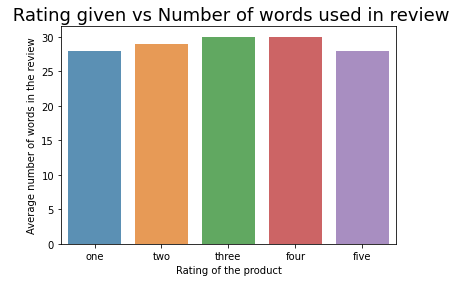

In [90]:
colors = ['gold', 'orange','yellowgreen', 'lightcoral', 'lightskyblue']
top = ['one','two','three','four','five']
value = [int(on), int(to),int(three),int(four),int(five)]
sns.barplot(top, value, alpha=0.8)
plt.xlabel('Rating of the product', fontsize=10)
plt.ylabel('Average number of words in the review', fontsize=10)
plt.title(" Rating given vs Number of words used in review", fontsize=18)
plt.show()

<b> All ratings are nearly of similar length

In [91]:
f = rr.loc[rr['Rating'] == 5,:]
ss = list(f['processed_Review'])
aa=[]
for i in range(0,len(ss)):
    ss[i] = str(ss[i])
    aa.append(ss[i].split(' '))

In [92]:
all_words = [j for i in aa for j in i]
all_words[:5]

['love', 'dress', 'sooo', 'pretty', 'happened']

<b> Predicting Review Rating From Review Title

In [93]:
X = list(rr['processed_Review'])
Y = list(rr['Rating'])
(X[:5],Y[:5])

(['absolutely wonderful silky sexy comfortable',
  'love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite',
  'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c',
  'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c',
  'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment'],
 [4, 5, 3, 3, 5])

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [95]:
# Using tfidf vectorizer¶

from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_features(X_train, X_val, X_test):
    tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.9, ngram_range=(1, 2),token_pattern='(\S+)')
    X_train = tfidf_vectorizer.fit_transform(X_train)
    X_val = tfidf_vectorizer.transform(X_val)
    X_test = tfidf_vectorizer.transform(X_test)
    
    return X_train, X_val, X_test, tfidf_vectorizer.vocabulary_


In [96]:
X_train_tfidf, X_val_tfidf, X_test_tfidf, tfidf_vocab = tfidf_features(X_train, X_val, X_test)

<b> Logisitic regression

In [97]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

def train_classifier(X_train, y_train):    
    clf = OneVsRestClassifier(LogisticRegression())
    clf.fit(X_train, y_train)
    return clf

In [98]:
classifier_tfidf = train_classifier(X_train_tfidf, y_train)

In [99]:
y_val_predicted_labels_tfidf = classifier_tfidf.predict(X_val_tfidf)

In [100]:
y_val_predicted_labels_tfidf  ==2

array([ True, False, False, ..., False, False, False])

### Predictions:

<b> Prediction For Positive and Negative Reviews

In [101]:
# For a negative Review

X_val[0]

'look like wearing dress sad sad sack fabric le ideal shape speak love pocket way much fabric petite person dress got good someone sadly person not'

In [102]:
y_val_predicted_labels_tfidf[0]

2

Rating 2 is correctly predicted

In [103]:
# For a negative Review

X_val[15]

'didn think like due high neck store soft tried black motif dress comfortable flattering definitely versatile piece dress denim jacket dress heel pocket'

In [104]:
y_val_predicted_labels_tfidf[15]

5

Rating 5 is correctly predicted



<b>Predictions for more ratings:

In [105]:
(X_val[42],y_val_predicted_labels_tfidf[42])

('huge normally wear medium huge unflattering', 2)

In [106]:
(X_val[68],y_val_predicted_labels_tfidf[43])

('absolutely love legging warm comfortable great way relax long day snuggle stretch even longer wash wear easy even wear house bought green love well go sweater shirt etc',
 3)

In [107]:
(X_val[101],y_val_predicted_labels_tfidf[101])

('decide pant trying store soft beautiful blue color however found bit small usually take l retailer pant tight probably could pull tunic top however spite fabric fit not comfortable good alternative denim slender rather curvy',
 4)

In [108]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score


def print_evaluation_scores(y_val, predicted):
    print(accuracy_score(y_val, predicted))
    print(f1_score(y_val, predicted, average='weighted'))
print_evaluation_scores(y_val, y_val_predicted_labels_tfidf)

0.757197872730607
0.7358718645937748


<b> ABOUT 75% ACCURACY HAS BEEN REACHED¶

## Conclusion:

- In this project we have used sentiment analysis to determine whether the product is recommended or not. We have built models with different machine learning and Deep learning algorithms and compare their performance. Thus, we have determined the algorithm that makes the most accurate emotion estimation by using the information obtained from the Review Text variable.
- When the scores are examined in the Compare section, it is seen that the scores are generally close to each other, but the Random Forest model stands out.
- When a new customer without any previous purchase history visits the e-commerce website for the first time, he/she is recommended the most popular products sold on the company's website. Once, he/she makes a purchase, the recommendation system updates and recommends other products based on the purchase history and ratings provided by other users on the website. The latter part is done using collaborative filtering techniques.
- Further, we have created Review Rating Prediction Model by using Logistic Regression with accuracy of 75%.
- With this model e-commerce will be able predict product ratings for future cutomers and will be able to recommend most recommended and rated products.
- To conclude this project, these models will facilitate in cost saving and better product offerings to the e-commerce customers, which will eventually upscale the business and revenue for the e-commerce
